# 株式市場のデータ解析
株のデータを解析して、未来の株価が分かったら大金持ちになれるかも知れません。 それはさておき、Pythonと周辺ライブラリを使うと、株価データのような、時系列データの解析も比較的簡単に行う事ができます。

## 次のような課題について考えて行くことにしましょう。

1. ) 株価の時間による変化を見てみる。
2. ) 日ごとの変動を可視化する。
3. ) 移動平均を計算する
4. ) 複数の株価の終値の相関を計算する
5. ) 複数の株価の変動の関係を見る
6. ) 特定の株のリスクを計算する
7. ) シミュレーションを使った未来の予測

## 株価データの基本
pandasを使って株価のデータを扱う基本を学んで行きましょう。

In [2]:
import pandas as pd 
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
from pandas_datareader import DataReader

In [7]:
from datetime import datetime

In [8]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [10]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [11]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo',  start, end)

In [12]:
type(AAPL )

pandas.core.frame.DataFrame

In [13]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,189.561753,185.823705,187.686694,187.711953,3.270475e+07,186.174273
std,22.281577,22.008797,22.145621,22.160721,1.417972e+07,21.904664
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,173.035004,169.724998,171.320000,171.004997,2.288735e+07,170.214981
50%,187.399994,184.940002,186.289993,186.119995,2.918400e+07,184.351776
75%,209.375000,205.784996,207.320000,207.760002,3.919905e+07,205.900421
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [15]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-03-16 to 2019-03-15
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


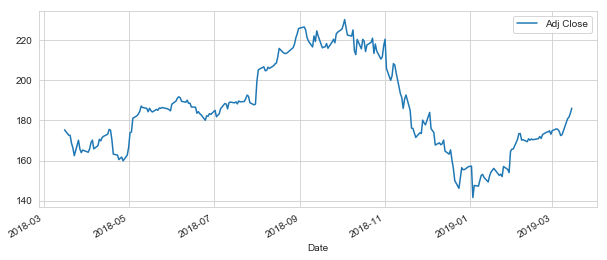

In [16]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

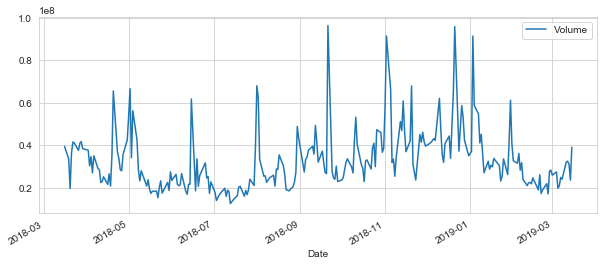

In [17]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [19]:
#移動平均線 10日平均
ma_day = [10,20,50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    #     AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [20]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2018-03-16,179.119995,177.619995,178.649994,178.020004,39404700.0,175.349915,NaN,NaN,NaN
2018-03-19,177.470001,173.660004,177.320007,175.300003,33446800.0,172.670731,NaN,NaN,NaN
2018-03-20,176.800003,174.940002,175.240005,175.240005,19649400.0,172.611618,NaN,NaN,NaN
2018-03-21,175.089996,171.259995,175.039993,171.270004,36338100.0,168.701157,NaN,NaN,NaN
2018-03-22,172.679993,168.600006,170.000000,168.850006,41490800.0,166.317459,NaN,NaN,NaN


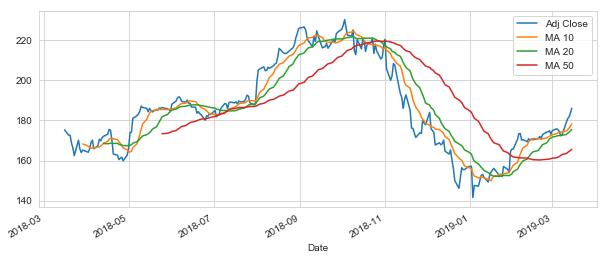

In [21]:
AAPL[['Adj Close', 'MA 10','MA 20', 'MA 50']].plot(subplots=False,figsize=(10,4))

In [22]:
#昨日の終値との比較
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [23]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2018-03-16,179.119995,177.619995,178.649994,178.020004,39404700.0,175.349915,NaN,NaN,NaN,NaN
2018-03-19,177.470001,173.660004,177.320007,175.300003,33446800.0,172.670731,NaN,NaN,NaN,-0.015279
2018-03-20,176.800003,174.940002,175.240005,175.240005,19649400.0,172.611618,NaN,NaN,NaN,-0.000342
2018-03-21,175.089996,171.259995,175.039993,171.270004,36338100.0,168.701157,NaN,NaN,NaN,-0.022655
2018-03-22,172.679993,168.600006,170.000000,168.850006,41490800.0,166.317459,NaN,NaN,NaN,-0.014130


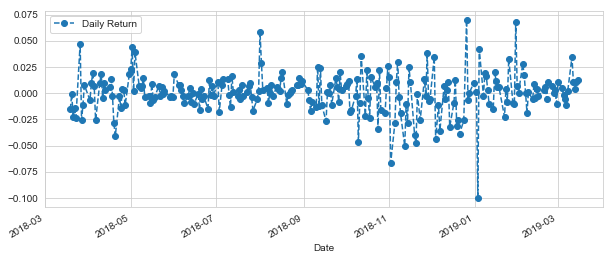

In [24]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True, linestyle='--', marker='o')

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


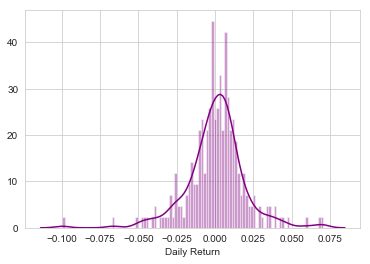

In [25]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

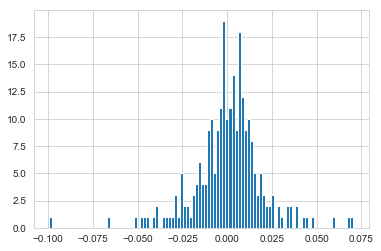

In [26]:
AAPL['Daily Return'].hist(bins=100)

In [27]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo', start, end)['Adj Close']

In [28]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-03-16,175.349915,1571.680054,1135.729980,93.029739
2018-03-19,172.670731,1544.930054,1099.819946,91.348114
2018-03-20,172.611618,1586.510010,1097.709961,91.584137
2018-03-21,168.701157,1581.859985,1090.880005,90.944923
2018-03-22,166.317459,1544.920044,1049.079956,88.299576


In [29]:
tech_rets = closing_df.pct_change()

In [31]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-03-16,NaN,NaN,NaN,NaN
2018-03-19,-0.015279,-0.017020,-0.031618,-0.018076
2018-03-20,-0.000342,0.026914,-0.001918,0.002584
2018-03-21,-0.022655,-0.002931,-0.006222,-0.006980
2018-03-22,-0.014130,-0.023352,-0.038318,-0.029087


/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


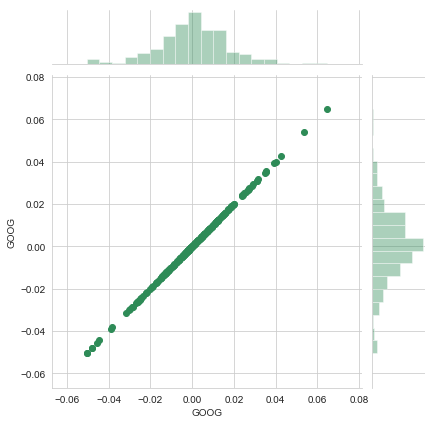

In [32]:
sns.jointplot('GOOG','GOOG', tech_rets, kind='scatter', color='seagreen')

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


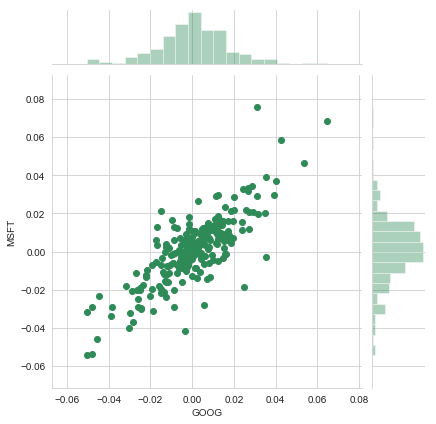

In [37]:
sns.jointplot('GOOG','MSFT', tech_rets, kind='scatter', color='seagreen')

# 10年分にしてみる

In [33]:
start = datetime(end.year-10,end.month,end.day)
closing_df2 = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo', start, end)['Adj Close']

In [34]:
closing_df2.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2009-03-16,9.089478,66.980003,158.812088,12.714716
2009-03-17,9.493370,71.349998,166.586517,13.223307
2009-03-18,9.670549,71.250000,165.473755,13.270249
2009-03-19,9.680075,70.099998,163.903961,13.411090
2009-03-20,9.677216,69.959999,164.013245,13.348494


/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


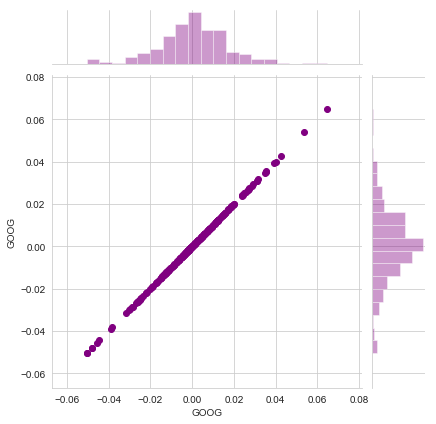

In [35]:
sns.jointplot('GOOG','GOOG',data=tech_rets,kind='scatter',color='purple')

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


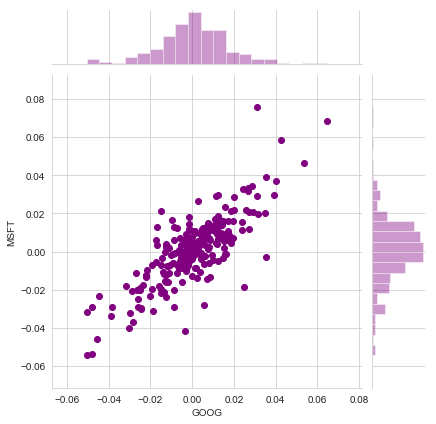

In [36]:
sns.jointplot('GOOG','MSFT',data=tech_rets,kind='scatter',color='purple')

2つの会社の株価の変化率は相当関係があることがわかります。pearsonrは相関係数(正確には、ピアソン積率相関係数）ですが、0.52と正に相関していることを示しています。

url - https://ja.wikipedia.org/wiki/%E7%9B%B8%E9%96%A2%E4%BF%82%E6%95%B0

相関係数について、感覚的な理解を助けてくれる図を紹介しておきます。

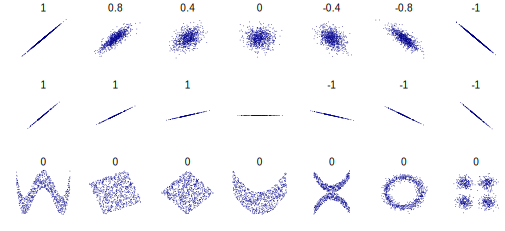

In [39]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

2社の間の比較は、色々な組み合わせを考える事が出来ますが、Seabornを使うと、このような比較をすべてのパターンについて、簡単にやってくれます。 それが、sns.pairplot() です。

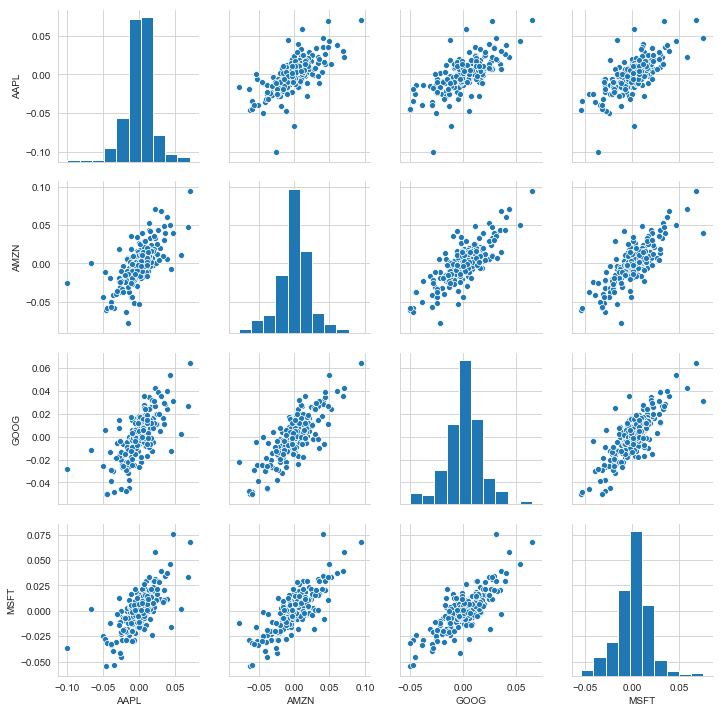

In [40]:
sns.pairplot(tech_rets.dropna())

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


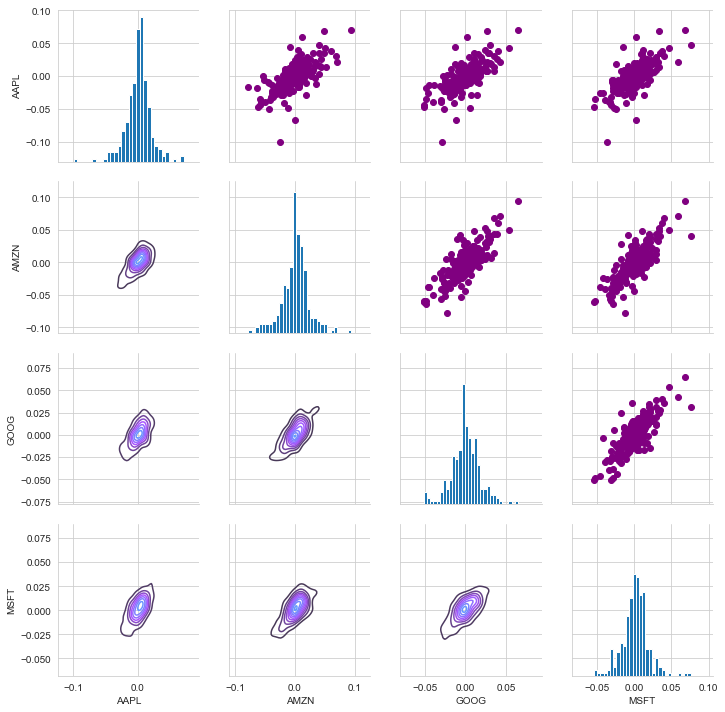

In [42]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


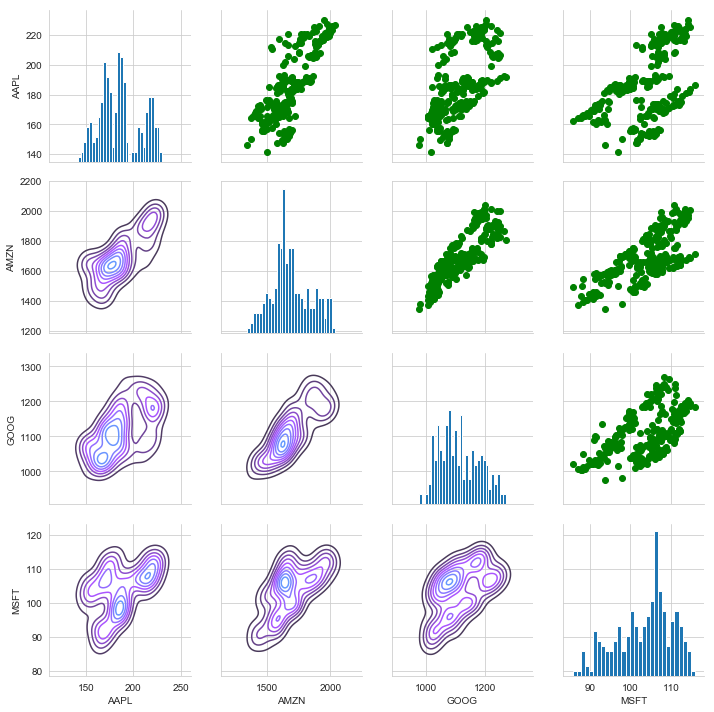

In [44]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='green')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


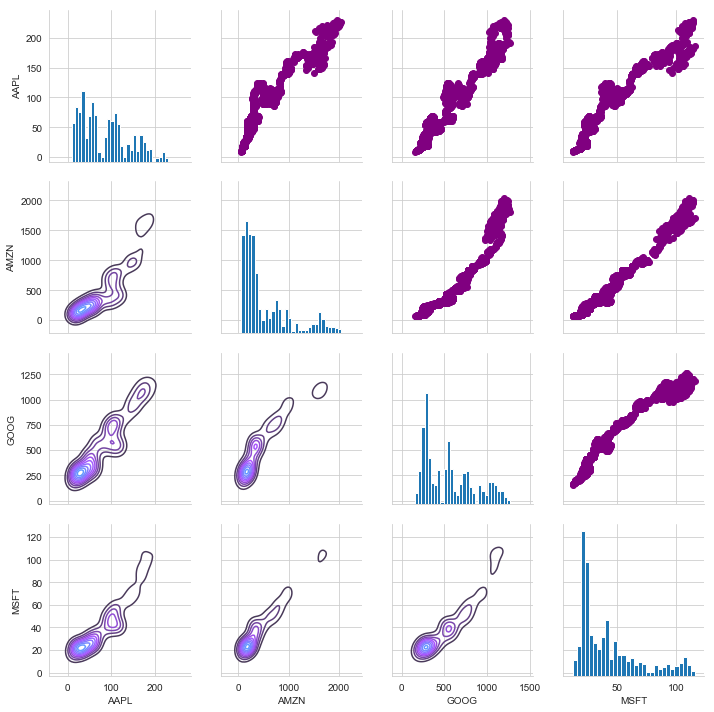

In [43]:
returns_fig = sns.PairGrid(closing_df2)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

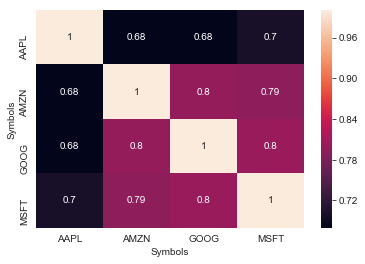

In [45]:
sns.heatmap(tech_rets.corr(), annot=True)

In [46]:
#リターンとリスク
rets = tech_rets.dropna()

In [47]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-03-19,-0.015279,-0.017020,-0.031618,-0.018076
2018-03-20,-0.000342,0.026914,-0.001918,0.002584
2018-03-21,-0.022655,-0.002931,-0.006222,-0.006980
2018-03-22,-0.014130,-0.023352,-0.038318,-0.029087
2018-03-23,-0.023157,-0.031950,-0.026223,-0.029068


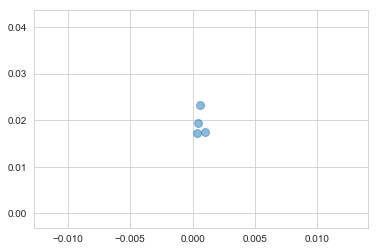

In [48]:
plt.scatter(rets.mean(), rets.std(), alpha=.5, s=np.pi*20)

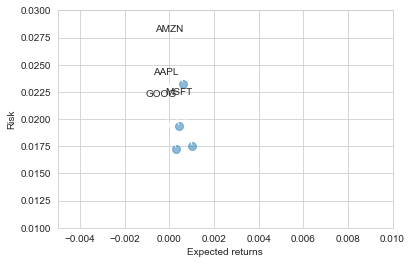

In [53]:
plt.scatter(rets.mean(), rets.std(), alpha=.5, s=np.pi*20)
plt.ylim([0.01,0.030])
plt.xlim([-0.005, 0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label,xy=(x,y), xytext=(0,50),
                textcoords = 'offset points', ha = 'right', va='bottom',
                arrowprops=dict(arrowstyle='-', connectionstyle='arc3'))

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


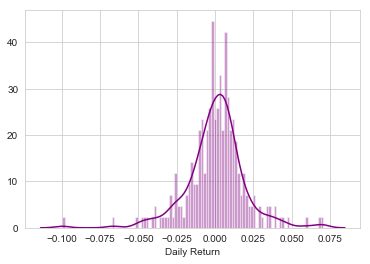

In [54]:
#value at risk
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [55]:
rets['AAPL'].quantile(0.05)

-0.029930148516846986

In [56]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [60]:
def stock_monte_carlo(start_price, days, mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

In [61]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-03-16,1155.880005,1131.959961,1154.140015,1135.729980,3092000,1135.729980
2018-03-19,1121.989990,1089.010010,1120.010010,1099.819946,2805900,1099.819946
2018-03-20,1105.199951,1083.459961,1099.000000,1097.709961,1831900,1097.709961
2018-03-21,1106.300049,1085.150024,1092.739990,1090.880005,1878900,1090.880005
2018-03-22,1082.900024,1045.910034,1081.880005,1049.079956,2667000,1049.079956


Text(0.5, 1.0, 'Monte Carlo Analysis')

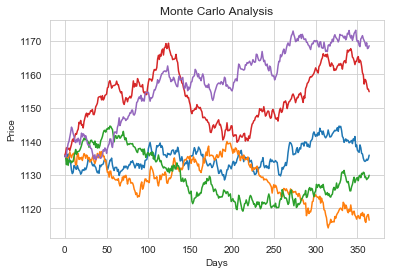

In [62]:
start_price = GOOG.iloc[0,5]

for num in range(5):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')

In [63]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

(array([1., 1., 1., ..., 0., 0., 1.]),
 array([1065.00860067, 1065.7772179 , 1066.54583514, ..., 1217.1948126 ,
        1217.96342983, 1218.73204706]),
 <a list of 200 Patch objects>)

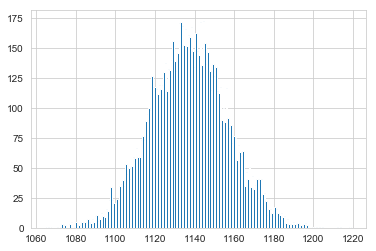

In [64]:
plt.hist(simulations, bins=200)

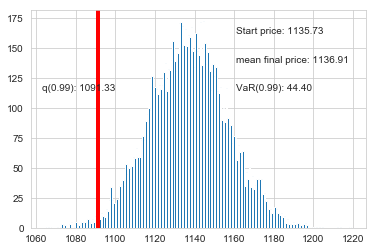

In [67]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s='Start price: {:0.2f}'.format(start_price))
plt.figtext(0.6, 0.7, 'mean final price: {:0.2f}'.format(simulations.mean()))
plt.figtext(0.6, 0.6, 'VaR(0.99): {:0.2f}'.format(start_price-q))
plt.figtext(0.15, 0.6, 'q(0.99): {:0.2f}'.format(q))

plt.axvline(x=q, linewidth=4,color='r')

シミュレーションで、グーグルの株価のVaRを計算することができました。1年という期間、99%の信頼区間でのVaRは、1株（526.4ドル）あたり、18.38ドルであることがわかります。99%の可能性で、損失はこれ以内に収まる計算になるわけです。

お疲れ様でした。ひとまず、株価のデータ解析を終えることができました。 追加の課題をいくつか考える事ができます。

1.) このレクチャーで学んだVaRを計算する2つの方法を、ハイテク株では無い銘柄に適用してみましょう。

2.) 実際の株価でシミュレーションを行い、リスクの予測やリターンについて検証してみましょう。過去のデータから現在の株価を予測することで、これが出来るはずです。

3.) 関連のある銘柄同士の値動きに注目してみましょう。ペアトレードという投手法が実際にありますが、ここに繋がる知見を得られるかも知れません。